In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fruits:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5857%2F2609027%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T192151Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8a43a1a83dc0ff44926f59ff850e954ed0aff954baff7de6f13abd8abf10fe7b216001c4452f09de850820e547a50024075aeafb565e318a9012d8aed6b730e68dd4a89d2740195de1f2c0fe9af0762ddbe257438792c31cc940503db0bebaa31aa9e33145e86237203d0fa39fe6e06eaf3f0a1f1747a665c92d30ac5f8120bc3677093b5d5bfe1fe25fe24fe1fb1ae60e07640c5c3a799b764bf17ba1bd5d3255df5f2e0a88dd0fb3ce8be027b5686e5bf6600325eafa27bb3919b3c2b8658c836e9e69c921f43ebc7d1a052d2ef1d4c491a2d45f60ede8d6adc78055af6e5551bbde84eb2935391c799c23e01a66cc689c6b6538cc4ca1fb5521d4b7932d91,banananaaaa:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1767986%2F2902808%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T192151Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3eb3739faf78486b583770c708dbd3ddc5e83e3ef61fe19c7ea5ea5ed592cc8ea252f57163420fcc621d20cc5ec9b7fc17b9e3a13b9fbc3c526df87be96b716f697db67627e3a7c0bd734cc6c27b922990273d09f227b73d23571c2491f1c2fde5a79a97c4929691a0a983af2b45c3f5166e91c595bdcad6df3fa5407fcfcda6c1cd2de2ed2103420da2c7b809ff93f6645713e3928dbeeded321e26dc11bbc0de62040eaea2e85507bb2c33013ce4b08fa4fea1dcd6011ebeb2ea9d9670ec38f2b5c47b4428658bcb3638c0463c2d8a3378aae2501b3b2df706f3a78c020c5b9f4332367b51f076d51d2b3c7467516f7d06b09b310057ef092c717faaab5851,good-and-bad-fruits-ieee-extended:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2008587%2F3322713%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T192151Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D714a469ce3320cd0f2586556c67df5ca62721f1fc6e18c2398acbe2d64dcef368c7692e1ae92e091a7038965208fc7ab3e833ff2c06af42e3d486c843dde8892480000657f967f050bfeecc02afea401db31a291de240521dc71d18e40658fa0d7e44e88498c6932c6ec0ac193382edba4b942a5f0e4352cabec67529c803554379a35f3d400570c103ad926d1e43ecf853336f95c1f80f4f17b3bca9dfd14d695457b3aee4d2f7551e8637e50a8837d26199e367d27603a67cc54d1f969e92074fbdc840b67a7f894442cf6b4d0f4ace6c603060a7e2936a13202276142fc6c9a63a895fa8c6cab941c6e4e770fa7ad20557adf6c96b03d7dd3259b49ec4ebe,sample-fruitsveg:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2034784%2F3374672%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T192151Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D74e6b5c433ba80d6b57096b53d2b635670e0f3ac8980fa7daadce77149e482d15a37d40676f7e841491e0f9963022bfdb12e52ca90e1aee4c8e713f6d006a4f19cd36717f78e6dc8b2665225363a3bc5c094644d061ca5a82afbc911769681a10ea512c8114dba5850aac4a072d556e9ffa187f31147d2b9694d2fe4018fe4b9f150b35735a315ac520a0e9037fc7d56ab0d98319a8cde2173a73a38c1c674e4a0cc1cc9fd31acf138f57e645d4ef0734128b574ae91f21785a2fa3040739ad8f2520feecd1f58e8724611f72d8bb4236d2b5961b95a6e3f50e7275c5eed108c55f3df9918b691cac85890f460d8d878e8aa3df8946d15176eb0df5ac6b9f7ef'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1379678841 bytes downloaded
Downloaded and uncompressed: fruits
[==================================================] 252268 bytes downloaded
Downloaded and uncompressed: banananaaaa
[==================================================] 212292963 bytes downloaded
Downloaded and uncompressed: good-and-bad-fruits-ieee-extended
[==================================================] 167051 bytes downloaded
Downloaded and uncompressed: sample-fruitsveg
Data source import complete.


In [3]:
# # Add the transformation of image
# data_transforms = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Resize((224, 224)),
#     transforms.Normalize((0.5,)*3, (0.5,)*3)
# ])

# Path for training and validation dataset
#training_path = "../input/fruits/fruits-360/Training"
#validating_path = "../input/fruits/fruits-360/Test"

train_path = "../input/good-and-bad-fruits-ieee-extended/IEEEFRUITSDATA_test&train/train"
valid_path = "../input/good-and-bad-fruits-ieee-extended/IEEEFRUITSDATA_test&train/test"

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import load_model
import os
import tensorflow as tf


In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

# train_path = r'/content/drive/MyDrive/dlp_dataset/train'
# valid_path = r'/content/drive/MyDrive/dlp_dataset/test'


In [6]:
# Import the mobilenet library as shown below and add preprocessing layer to the front of MobileNet
# Here we will be using imagenet weights

mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


17225924/17225924 [==============================] - 0s 0us/step


In [7]:
# don't train existing weights
for layer in mobilenet.layers:
    layer.trainable = False

In [15]:
# useful for getting number of output classes
folders = glob(r'../input/good-and-bad-fruits-ieee-extended/IEEEFRUITSDATA_test&train/train/*')

In [16]:
# our layers - you can add more if you want
x = Flatten()(mobilenet.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [17]:
# create a model object
model_mobilenet_final = Model(inputs=mobilenet.input, outputs=prediction)

In [18]:
# tell the model what cost and optimization method to use
model_mobilenet_final.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
# Use the Image Data Generator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 9036 images belonging to 12 classes.
Found 3013 images belonging to 12 classes.


In [21]:
# fit the model
# Run the cell. It will take some time to execute
history_mobilenet_final = model_mobilenet_final.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

model_mobilenet_final.save('mobilenet_dlp.h5')
print("model saved to Disk.")

Epoch 1/10
283/283 [==============================] - 120s 416ms/step - loss: 0.6781 - accuracy: 0.9254 - val_loss: 0.3544 - val_accuracy: 0.9711
Epoch 2/10
283/283 [==============================] - 122s 432ms/step - loss: 0.2717 - accuracy: 0.9751 - val_loss: 0.4176 - val_accuracy: 0.9744
Epoch 3/10
283/283 [==============================] - 116s 409ms/step - loss: 0.2067 - accuracy: 0.9833 - val_loss: 0.2310 - val_accuracy: 0.9864
Epoch 4/10
283/283 [==============================] - 115s 407ms/step - loss: 0.1531 - accuracy: 0.9892 - val_loss: 0.3420 - val_accuracy: 0.9788
Epoch 5/10
283/283 [==============================] - 115s 407ms/step - loss: 0.1554 - accuracy: 0.9888 - val_loss: 0.1852 - val_accuracy: 0.9927
Epoch 6/10
283/283 [==============================] - 117s 415ms/step - loss: 0.1107 - accuracy: 0.9928 - val_loss: 0.1773 - val_accuracy: 0.9904
Epoch 7/10
283/283 [==============================] - 118s 416ms/step - loss: 0.0766 - accuracy: 0.9938 - val_loss: 0.1765 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


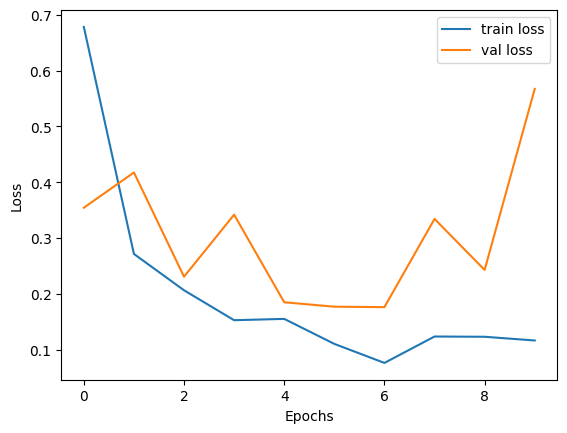

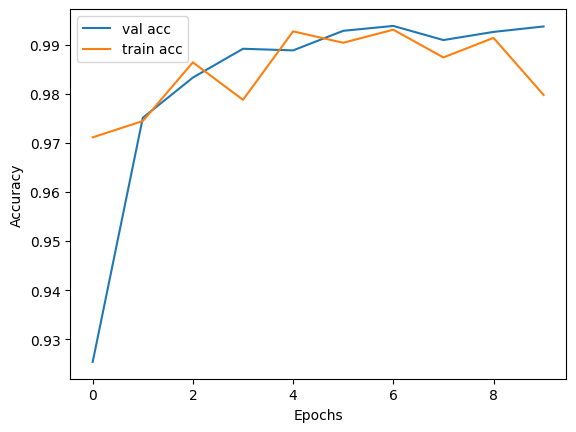

In [22]:
#plot the loss
plt.plot(history_mobilenet_final.history['loss'], label='train loss')
plt.plot(history_mobilenet_final.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# plot the accuracy
plt.plot(history_mobilenet_final.history['accuracy'], label='val acc')
plt.plot(history_mobilenet_final.history['val_accuracy'], label='train acc')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [23]:
# dirname = os.path.join(os.path.dirname(__file__))
model_mobilenet_new_final = load_model('mobilenet_dlp.h5')
print("model loaded.")

model loaded.


In [24]:
model_mobilenet_new_final.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

In [25]:
test_generator = ImageDataGenerator(rescale = 1./255)
test_data_generator = test_generator.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


Found 3013 images belonging to 12 classes.


<ipython-input-25-f70a12e63e33>:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


In [26]:
predictions = model_mobilenet_new_final.predict(test_data_generator, steps=test_steps_per_epoch)


95/95 [==============================] - 8s 78ms/step


In [27]:
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

print(test_data_generator.classes)
print(predicted_classes)

[ 0  0  0 ... 11 11 11]
[ 0  0  0 ... 11 11 11]


In [28]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())
print(class_labels)

['Apple_Bad', 'Apple_Good', 'Banana_Bad', 'Banana_Good', 'Guava_Bad', 'Guava_Good', 'Lime_Bad', 'Lime_Good', 'Orange_Bad', 'Orange_Good', 'Pomegranate_Bad', 'Pomegranate_Good']


In [29]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
cmat = confusion_matrix(true_classes, predicted_classes)
acc = accuracy_score(true_classes, predicted_classes)
print(report)
print(cmat)
print(acc)

                  precision    recall  f1-score   support

       Apple_Bad       0.92      1.00      0.96       250
      Apple_Good       1.00      0.91      0.95       250
      Banana_Bad       1.00      0.97      0.99       250
     Banana_Good       0.97      1.00      0.98       250
       Guava_Bad       1.00      0.93      0.96       252
      Guava_Good       0.98      1.00      0.99       250
        Lime_Bad       1.00      1.00      1.00       250
       Lime_Good       1.00      1.00      1.00       250
      Orange_Bad       0.98      0.97      0.97       254
     Orange_Good       0.94      0.99      0.97       257
 Pomegranate_Bad       1.00      1.00      1.00       250
Pomegranate_Good       0.98      1.00      0.99       250

        accuracy                           0.98      3013
       macro avg       0.98      0.98      0.98      3013
    weighted avg       0.98      0.98      0.98      3013

[[250   0   0   0   0   0   0   0   0   0   0   0]
 [  5 227   0   1 

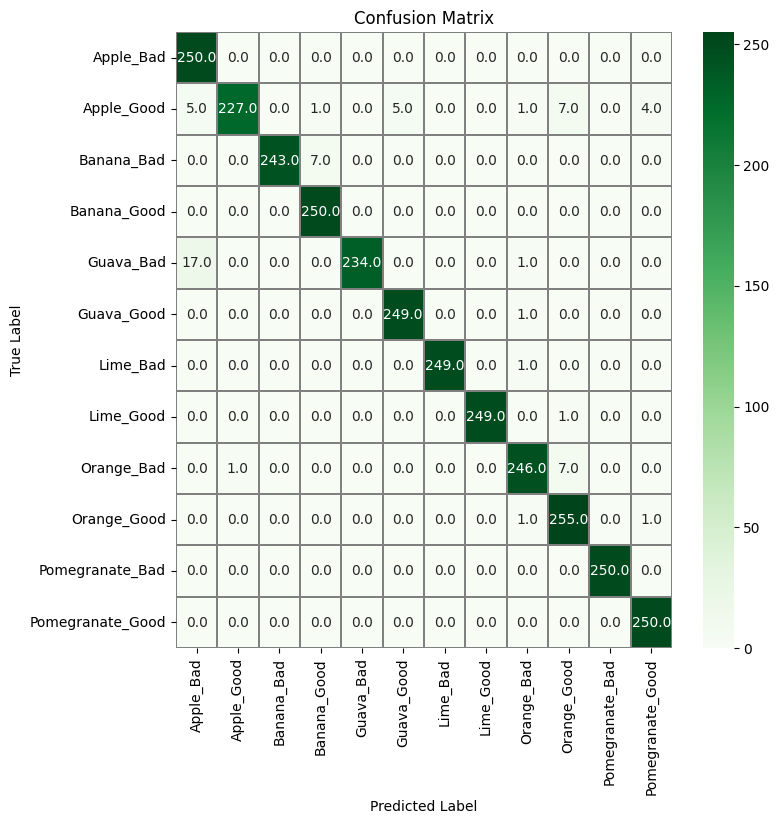

In [30]:
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.set_xticklabels(['Apple_Bad','Apple_Good','Banana_Bad', 'Banana_Good', 'Guava_Bad', 'Guava_Good', 'Lime_Bad', 'Lime_Good', 'Orange_Bad', 'Orange_Good', 'Pomegranate_Bad', 'Pomegranate_Good' ])
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_yticklabels(['Apple_Bad','Apple_Good','Banana_Bad', 'Banana_Good', 'Guava_Bad', 'Guava_Good', 'Lime_Bad', 'Lime_Good', 'Orange_Bad', 'Orange_Good', 'Pomegranate_Bad', 'Pomegranate_Good' ])

plt.title("Confusion Matrix")
plt.show()

In [31]:
def get_tpr_fnr_fpr_tnr(cm):
    """
    This function returns class-wise TPR, FNR, FPR & TNR
    [[cm]]: a 2-D array of a multiclass confusion matrix
            where horizontal axes represent actual classes
            and vertical axes represent predicted classes
    {output}: a dictionary of class-wise accuracy parameters
    """
    dict_metric = dict()
    n = len(cm[0])
    row_sums = cm.sum(axis=1)
    col_sums = cm.sum(axis=0)
    array_sum = sum(sum(cm))
    #initialize a blank nested dictionary
    for i in range(1, n+1):
        keys = str(i)
        dict_metric[keys] = {"TPR":0, "FNR":0, "FPR":0, "TNR":0}
    # calculate and store class-wise TPR, FNR, FPR, TNR
    for i in range(n):
        for j in range(n):
            if i == j:
                keys = str(i+1)
                tp = cm[i, j]
                fn = row_sums[i] - cm[i, j]
                dict_metric[keys]["TPR"] = tp / (tp + fn)
                dict_metric[keys]["FNR"] = fn / (tp + fn)
                fp = col_sums[i] - cm[i, j]
                tn = array_sum - tp - fn - fp
                dict_metric[keys]["FPR"] = fp / (fp + tn)
                dict_metric[keys]["TNR"] = tn / (fp + tn)
    return dict_metric

In [32]:
import pandas as pd
df = pd.DataFrame(get_tpr_fnr_fpr_tnr(confusion_mtx)).transpose()
classes = ['Apple_Bad','Apple_Good','Banana_Bad', 'Banana_Good', 'Guava_Bad', 'Guava_Good', 'Lime_Bad', 'Lime_Good', 'Orange_Bad', 'Orange_Good', 'Pomegranate_Bad', 'Pomegranate_Good' ]
df['CLASSES'] = classes
df.set_index('CLASSES', inplace=True)
df

,TPR,FNR,FPR,TNR
CLASSES,,,,
Apple_Bad,1.000000,0.000000,0.007962,0.992038
Apple_Good,0.908000,0.092000,0.000362,0.999638
Banana_Bad,0.972000,0.028000,0.000000,1.000000
Banana_Good,1.000000,0.000000,0.002895,0.997105
Guava_Bad,0.928571,0.071429,0.000000,1.000000
Guava_Good,0.996000,0.004000,0.001810,0.998190
Lime_Bad,0.996000,0.004000,0.000000,1.000000
Lime_Good,0.996000,0.004000,0.000000,1.000000
Orange_Bad,0.968504,0.031496,0.001812,0.998188


In [33]:
# converter = tf.lite.TFLiteConverter.from_keras_model(model_mobilenet_new_final)
# tflite_model = converter.convert()

# with open("model.tflite", "wb") as f:
#     f.write(tflite_model)

In [34]:
print("Mobilenet analysis: ")
print("TPR average: ",df["TPR"].mean())
print("FPR average: ",df["FPR"].mean())
print("TNR average: ",df["TNR"].mean())
print("FNR average: ",df["FNR"].mean())

Mobilenet analysis: 
TPR average:  0.9797744387009989
FPR average:  0.0018411553775190348
TNR average:  0.998158844622481
FNR average:  0.02022556129900105
